In [1]:
!nvidia-smi

Thu Dec  3 13:26:11 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    12W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 50kB/s 


In [3]:
import tensorflow as tf
tf.__version__

'2.3.1'

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
# silent all warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import warnings
warnings.filterwarnings('ignore')
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [6]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Flatten

In [7]:
#loading data
from google.colab import files

uploaded = files.upload()

Saving citrus.csv to citrus.csv


In [8]:
uploaded

{'citrus.csv': b'name,diameter,weight,red,green,blue\norange,2.96,86.76,172,85,2\norange,3.91,88.05,166,78,3\norange,4.42,95.17,156,81,2\norange,4.47,95.6,163,81,4\norange,4.48,95.76,161,72,9\norange,4.59,95.86,142,100,2\norange,4.64,97.94,156,85,2\norange,4.65,98.5,142,74,2\norange,4.68,100.2,159,90,16\norange,4.69,100.31,161,76,6\norange,4.73,101.33,148,88,2\norange,4.74,101.66,166,69,2\norange,4.75,101.8,166,98,13\norange,4.77,102.56,166,86,6\norange,4.78,103.06,170,82,2\norange,4.82,103.1,162,87,12\norange,4.85,103.44,166,78,5\norange,4.91,103.46,151,79,2\norange,4.97,104.01,168,79,22\norange,5.02,104.1,179,73,2\norange,5.02,104.19,162,79,2\norange,5.08,104.56,156,94,2\norange,5.1,104.7,169,86,2\norange,5.11,104.82,146,84,2\norange,5.15,104.98,154,87,6\norange,5.16,105.22,168,82,2\norange,5.22,105.42,162,79,2\norange,5.22,105.47,161,75,10\norange,5.24,105.6,153,90,2\norange,5.24,105.62,157,85,15\norange,5.25,105.68,155,94,6\norange,5.26,106.29,155,93,2\norange,5.3,106.43,171,82,2\n

In [9]:
#file to be loaded into a pandas dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['citrus.csv']))

In [10]:
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [11]:

df = df.sample(frac=1)

In [12]:
df

,name,diameter,weight,red,green,blue
5541,grapefruit,9.95,173.64,142,70,15
4562,orange,10.17,178.34,159,82,6
3117,orange,8.87,158.61,159,90,2
6500,grapefruit,10.83,187.39,145,70,19
6750,grapefruit,10.99,189.95,156,71,7
...,...,...,...,...,...,...
9230,grapefruit,12.74,216.91,173,73,19
2286,orange,8.36,150.70,147,86,4
6252,grapefruit,10.66,184.37,166,60,18
667,orange,7.08,132.55,149,78,10


In [13]:
df = df.reset_index(drop=True)

In [14]:
#data shuffled and index reset
df

,name,diameter,weight,red,green,blue
0,grapefruit,9.95,173.64,142,70,15
1,orange,10.17,178.34,159,82,6
2,orange,8.87,158.61,159,90,2
3,grapefruit,10.83,187.39,145,70,19
4,grapefruit,10.99,189.95,156,71,7
...,...,...,...,...,...,...
9995,grapefruit,12.74,216.91,173,73,19
9996,orange,8.36,150.70,147,86,4
9997,grapefruit,10.66,184.37,166,60,18
9998,orange,7.08,132.55,149,78,10


In [15]:
df.shape

(10000, 6)

In [16]:
#checking information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [17]:
#checking total null value
df.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [18]:
#checking duplicates
duplicate = df.duplicated()
print(duplicate.sum())

0


In [19]:
duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [20]:
#no duplicates found
df[duplicate]

,name,diameter,weight,red,green,blue


In [21]:
'''
Incase duplicates are found we can delete duplciates 
df.drop_duplicates(inplace=True)
'''

'\nIncase duplicates are found we can delete duplciates \ndf.drop_duplicates(inplace=True)\n'

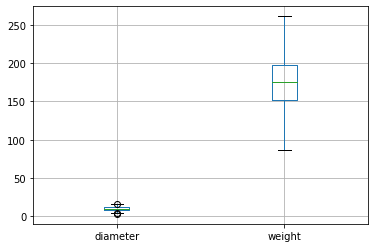

In [22]:
#searching for ouliers
#method1 - boxplot

df.boxplot(column=['diameter','weight'])



We find no outliers

In [23]:
#finding correlation of variables
df.corr()

,diameter,weight,red,green,blue
diameter,1.000000,0.999476,-0.217821,-0.396832,0.363307
weight,0.999476,1.000000,-0.214714,-0.392003,0.358916
red,-0.217821,-0.214714,1.000000,0.148937,-0.135900
green,-0.396832,-0.392003,0.148937,1.000000,-0.242495
blue,0.363307,0.358916,-0.135900,-0.242495,1.000000


In [24]:
df = df.drop(['weight'], axis=1)

In [25]:
df

,name,diameter,red,green,blue
0,grapefruit,9.95,142,70,15
1,orange,10.17,159,82,6
2,orange,8.87,159,90,2
3,grapefruit,10.83,145,70,19
4,grapefruit,10.99,156,71,7
...,...,...,...,...,...
9995,grapefruit,12.74,173,73,19
9996,orange,8.36,147,86,4
9997,grapefruit,10.66,166,60,18
9998,orange,7.08,149,78,10


The weght and diameter column are highly correlated, hence we drop one of these two, since diamter  is more relevant we diont drop diamter

In [26]:
#normalization (feature scaling)
#wer use sklearn to do this here we use standardscalar
#it does feature sclaing on the basis of z-score


In [27]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
df['diameter'] = std_scale.fit_transform(df[['diameter']])
df['red'] = std_scale.fit_transform(df[['red']])
df['green'] = std_scale.fit_transform(df[['green']])
df['blue'] = std_scale.fit_transform(df[['blue']])


In [29]:
df

,name,diameter,red,green,blue
0,grapefruit,-0.013187,-1.135670,-0.513382,0.401376
1,orange,0.099764,0.493864,0.511571,-0.591911
2,orange,-0.567674,0.493864,1.194874,-1.033372
3,grapefruit,0.438617,-0.848105,-0.513382,0.842837
4,grapefruit,0.520763,0.206299,-0.427969,-0.481546
...,...,...,...,...,...
9995,grapefruit,1.419238,1.835833,-0.257144,0.842837
9996,orange,-0.829515,-0.656395,0.853223,-0.812642
9997,grapefruit,0.351337,1.164848,-1.367510,0.732472
9998,orange,-1.486685,-0.464686,0.169920,-0.150450


In [30]:
#name is categorical we convert it into numberical - one hot encodoing


In [31]:
#creating dummy variables for name
dummy = pd.get_dummies(df['name'])

In [32]:
dummy

,grapefruit,orange
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
9995,1,0
9996,0,1
9997,1,0
9998,0,1


In [33]:
df = pd.concat((df, dummy), axis=1)

In [34]:
df

,name,diameter,red,green,blue,grapefruit,orange
0,grapefruit,-0.013187,-1.135670,-0.513382,0.401376,1,0
1,orange,0.099764,0.493864,0.511571,-0.591911,0,1
2,orange,-0.567674,0.493864,1.194874,-1.033372,0,1
3,grapefruit,0.438617,-0.848105,-0.513382,0.842837,1,0
4,grapefruit,0.520763,0.206299,-0.427969,-0.481546,1,0
...,...,...,...,...,...,...,...
9995,grapefruit,1.419238,1.835833,-0.257144,0.842837,1,0
9996,orange,-0.829515,-0.656395,0.853223,-0.812642,0,1
9997,grapefruit,0.351337,1.164848,-1.367510,0.732472,1,0
9998,orange,-1.486685,-0.464686,0.169920,-0.150450,0,1


In [35]:
df = df.drop(['name'], axis=1)

In [36]:
df

,diameter,red,green,blue,grapefruit,orange
0,-0.013187,-1.135670,-0.513382,0.401376,1,0
1,0.099764,0.493864,0.511571,-0.591911,0,1
2,-0.567674,0.493864,1.194874,-1.033372,0,1
3,0.438617,-0.848105,-0.513382,0.842837,1,0
4,0.520763,0.206299,-0.427969,-0.481546,1,0
...,...,...,...,...,...,...
9995,1.419238,1.835833,-0.257144,0.842837,1,0
9996,-0.829515,-0.656395,0.853223,-0.812642,0,1
9997,0.351337,1.164848,-1.367510,0.732472,1,0
9998,-1.486685,-0.464686,0.169920,-0.150450,0,1


In [37]:
#ornage = 0
#grapefruitt = 1
df =df.drop(['orange'],axis=1)

In [38]:
df

,diameter,red,green,blue,grapefruit
0,-0.013187,-1.135670,-0.513382,0.401376,1
1,0.099764,0.493864,0.511571,-0.591911,0
2,-0.567674,0.493864,1.194874,-1.033372,0
3,0.438617,-0.848105,-0.513382,0.842837,1
4,0.520763,0.206299,-0.427969,-0.481546,1
...,...,...,...,...,...
9995,1.419238,1.835833,-0.257144,0.842837,1
9996,-0.829515,-0.656395,0.853223,-0.812642,0
9997,0.351337,1.164848,-1.367510,0.732472,1
9998,-1.486685,-0.464686,0.169920,-0.150450,0


In [39]:
#renaming grapefruit to fruit
df = df.rename(columns={"grapefruit":"fruit"})

In [41]:
df

,diameter,red,green,blue,fruit
0,-0.013187,-1.135670,-0.513382,0.401376,1
1,0.099764,0.493864,0.511571,-0.591911,0
2,-0.567674,0.493864,1.194874,-1.033372,0
3,0.438617,-0.848105,-0.513382,0.842837,1
4,0.520763,0.206299,-0.427969,-0.481546,1
...,...,...,...,...,...
9995,1.419238,1.835833,-0.257144,0.842837,1
9996,-0.829515,-0.656395,0.853223,-0.812642,0
9997,0.351337,1.164848,-1.367510,0.732472,1
9998,-1.486685,-0.464686,0.169920,-0.150450,0


In [42]:
#data visualization
import seaborn as sns

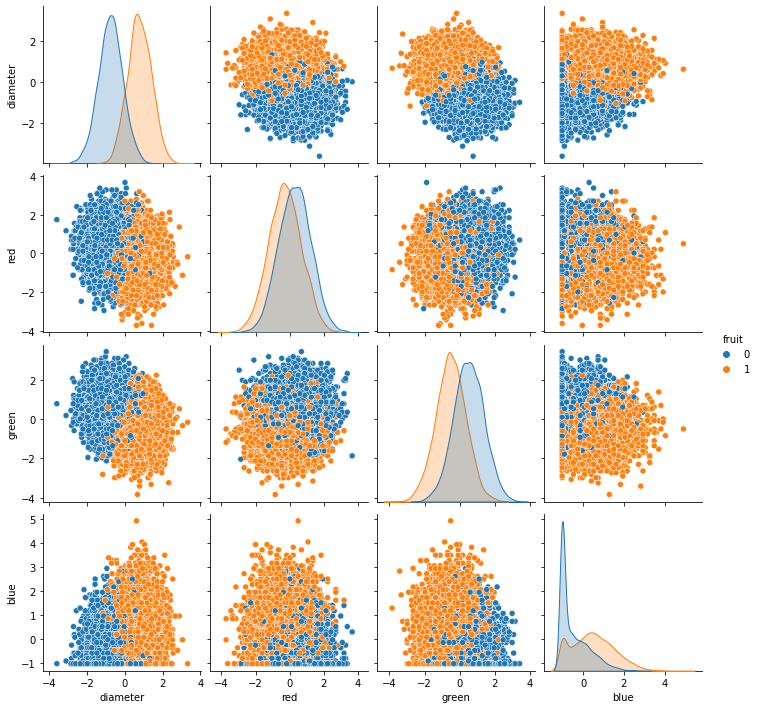

In [44]:
sns.pairplot(data=df, hue="fruit")

In [46]:
df.iloc[:,0:4]

,diameter,red,green,blue
0,-0.013187,-1.135670,-0.513382,0.401376
1,0.099764,0.493864,0.511571,-0.591911
2,-0.567674,0.493864,1.194874,-1.033372
3,0.438617,-0.848105,-0.513382,0.842837
4,0.520763,0.206299,-0.427969,-0.481546
...,...,...,...,...
9995,1.419238,1.835833,-0.257144,0.842837
9996,-0.829515,-0.656395,0.853223,-0.812642
9997,0.351337,1.164848,-1.367510,0.732472
9998,-1.486685,-0.464686,0.169920,-0.150450


In [47]:
#train test split and segregatoing x and y
x = df.iloc[:,0:4]
y = df['fruit']

In [48]:
x

,diameter,red,green,blue
0,-0.013187,-1.135670,-0.513382,0.401376
1,0.099764,0.493864,0.511571,-0.591911
2,-0.567674,0.493864,1.194874,-1.033372
3,0.438617,-0.848105,-0.513382,0.842837
4,0.520763,0.206299,-0.427969,-0.481546
...,...,...,...,...
9995,1.419238,1.835833,-0.257144,0.842837
9996,-0.829515,-0.656395,0.853223,-0.812642
9997,0.351337,1.164848,-1.367510,0.732472
9998,-1.486685,-0.464686,0.169920,-0.150450


In [49]:
y

0       1
1       0
2       0
3       1
4       1
       ..
9995    1
9996    0
9997    1
9998    0
9999    1
Name: fruit, Length: 10000, dtype: uint8

In [50]:
#train test split
from sklearn.model_selection import train_test_split

In [51]:
x_train , x_test, y_train , y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [52]:
x_train.shape

(8000, 4)

In [57]:
def baseline_model():
  model = Sequential()
  model.add(Dense(units=12, kernel_initializer='he_uniform', activation='relu', input_dim=x_train.shape[1]))
  model.add(Dense(units=8, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(units=4, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(units=1, kernel_initializer='he_uniform', activation='sigmoid'))

  model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
  return model

In [58]:
model = baseline_model()

In [59]:
model.fit(x=x_train, y=y_train, epochs=100, batch_size=16)

Epoch 1/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4444 - accuracy: 0.8431
Epoch 2/100
500/500 [==============================] - 1s 2ms/step - loss: 0.2033 - accuracy: 0.9260
Epoch 3/100
500/500 [==============================] - 1s 2ms/step - loss: 0.1767 - accuracy: 0.9301
Epoch 4/100
500/500 [==============================] - 1s 2ms/step - loss: 0.1745 - accuracy: 0.9309
Epoch 5/100
500/500 [==============================] - 1s 2ms/step - loss: 0.1732 - accuracy: 0.9306
Epoch 6/100
500/500 [==============================] - 1s 2ms/step - loss: 0.1724 - accuracy: 0.9310
Epoch 7/100
500/500 [==============================] - 1s 2ms/step - loss: 0.1719 - accuracy: 0.9309
Epoch 8/100
500/500 [==============================] - 1s 2ms/step - loss: 0.1710 - accuracy: 0.9304
Epoch 9/100
500/500 [==============================] - 1s 2ms/step - loss: 0.1708 - accuracy: 0.9311
Epoch 10/100
500/500 [==============================] - 1s 2ms/step - loss: 0.1708 - accura

In [61]:
#evaluation of model
_, accuracy = model.evaluate(x_train, y_train)

250/250 [==============================] - 0s 1ms/step - loss: 0.1617 - accuracy: 0.9348


In [63]:
accuracy

0.9347500205039978

In [64]:
test_predictions = model.predict_classes(x_test)

In [67]:
test_predictions

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [68]:
y_test

6252    0
4684    1
1731    0
4742    0
4521    0
       ..
6412    1
8285    1
7853    0
1095    0
6929    0
Name: fruit, Length: 2000, dtype: uint8

In [69]:
y_test[3]

1

In [71]:
pred_df = pd.DataFrame(test_predictions, columns=['Test_Prediction'])

In [72]:
pred_df

,Test_Prediction
0,0
1,1
2,1
3,0
4,0
...,...
1995,1
1996,1
1997,0
1998,0


In [73]:
_, test_accuracy = model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.1798 - accuracy: 0.9270
